<a href="https://colab.research.google.com/github/uvictoli/Machine_Learning/blob/main/Lv4/Lv4_%EC%A0%84%EC%B2%98%EB%A6%AC_5_8_%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1_%ED%95%B4%EA%B2%B0_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


기존 내용과 상이한 부분이 있어 주석으로 문제를 제출하는 것에 한계가 있기때문에,   
이번시간에는 게시글의 코드를 보며 필사하는 시간을 갖도록 하겠습니다.

## 데이터 로딩 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 

# 사이킷런 내장 데이터 셋 API 호출

iris = load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data)
df.columns =  ['sepal_length','sepal_width','petal_length','petal_width']
df['target']=iris.target
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [2]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 정규화 라이브러리 호출
from sklearn.preprocessing import MinMaxScaler

# PCA 라이브러리 호출
from sklearn.decomposition import PCA

## 👋 실습
---

1. x축 : sepal length y축 : sepal width로 하여 품종 데이터 분포 시각화
2. PCA를 이용해 차원 축소
3. 변환된 데이터 셋을 시각화

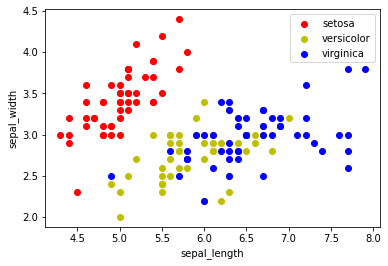

In [3]:
#setosa는 빨간색, versicolor는 노란색, virginica는 파란색
color=['r', 'y', 'b']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 
# 각 target 별로 다른 색으로 scatter plot 
for i, c in enumerate(color):
  x_axis_data = df[df['target'] == i]['sepal_length']
  y_axis_data = df[df['target'] == i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, color = c, label = iris.target_names[i])


plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [4]:
# Target 값을 제외한 모든 속성 값을 MinMaxScaler를 이용하여 변환
# 'sepal_length','sepal_width','petal_length','petal_width'
df_features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_scaler = MinMaxScaler().fit_transform(df_features)

In [5]:
# PCA를 이용하여 4차원 변수를 2차원으로 변환

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 / 데이터 반환
pca.fit(df_scaler)
df_pca = pca.transform(df_scaler)
print(df_pca.shape)

(150, 2)


In [6]:
# PCA 변환된 데이터의 컬럼명을 각각 PCA_1, PCA_2로 지정
df_pca = pd.DataFrame(df_pca, columns = ['PCA_1', 'PCA_2'])
df_pca['target'] = df.target
df_pca.head(3)

,PCA_1,PCA_2,target
0,-0.630703,0.107578,0
1,-0.622905,-0.104260,0
2,-0.669520,-0.051417,0


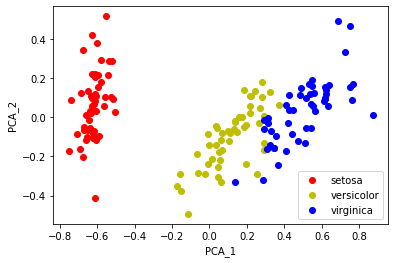

In [7]:
from numpy.core import einsumfunc
#setosa는 빨간색, versicolor는 노란색, virginica는 파란색
color=['r', 'y', 'b']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 
# 각 target 별로 다른 색으로 scatter plot 
for i, c in enumerate(color):
  x_axis_data = df_pca[df_pca['target'] == i]['PCA_1']
  y_axis_data = df_pca[df_pca['target'] == i]['PCA_2']
  plt.scatter(x_axis_data, y_axis_data, color = c, label = iris.target_names[i])

plt.legend()
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

## 정답
---


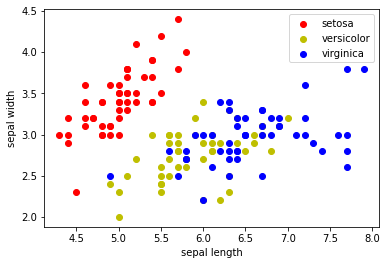

In [8]:
#setosa는 빨간색, versicolor는 노란색, virginica는 파란색

color=['r', 'y', 'b']


# setosa의 target 값은 0, versicolor는 1, virginica는 2. 

# 각 target 별로 다른 색으로 scatter plot 

for i, c in enumerate(color):

    x_axis_data = df[df['target']==i]['sepal_length']
    y_axis_data = df[df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data,color = c,label=iris.target_names[i])



plt.legend()

plt.xlabel('sepal length')

plt.ylabel('sepal width')

plt.show()


In [9]:
# Target 값을 제외한 모든 속성 값을 MinMaxScaler를 이용하여 변환

# 'sepal_length','sepal_width','petal_length','petal_width'

df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]

df_scaler = MinMaxScaler().fit_transform(df_features)



# PCA를 이용하여 4차원 변수를 2차원으로 변환



pca = PCA(n_components=2)



#fit( )과 transform( ) 을 호출하여 PCA 변환 / 데이터 반환

pca.fit(df_scaler)

df_pca = pca.transform(df_scaler)

print(df_pca.shape)

(150, 2)


In [10]:

# PCA 변환된 데이터의 컬럼명을 각각 PCA_1, PCA_2로 지정



df_pca = pd.DataFrame(df_pca)

df_pca.columns = ['PCA_1','PCA_2']

df_pca['target']=df.target

df_pca.head(3)

,PCA_1,PCA_2,target
0,-0.630703,0.107578,0
1,-0.622905,-0.104260,0
2,-0.669520,-0.051417,0


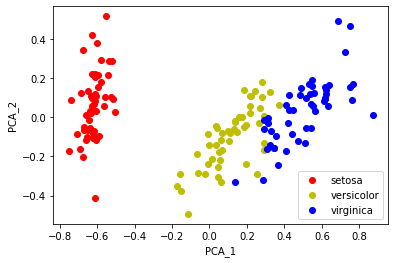

In [11]:
#setosa는 빨간색, versicolor는 노란색, virginica는 파란색

color=['r', 'y', 'b']



# setosa의 target 값은 0, versicolor는 1, virginica는 2. 

# 각 target 별로 다른 색으로 scatter plot 

for i, c in enumerate(color):

    x_axis_data = df_pca[df_pca['target']==i]['PCA_1']

    y_axis_data = df_pca[df_pca['target']==i]['PCA_2']

    plt.scatter(x_axis_data, y_axis_data, color = c,label=iris.target_names[i])



plt.legend()

plt.xlabel('PCA_1')

plt.ylabel('PCA_2')

plt.show()

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)